# Step 0: Import python libraries

In [38]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import os
import psutil

from astropy.io import fits


# Step 1: Search for and store BepiColombo data products using the search API

In [39]:
response = requests.get('https://pds.nasa.gov/api/search/1/products?q=((pds:Science_Facets.pds:wavelength_range eq "Visible") '
                        'and not (ops:Harvest_Info.ops:node_name eq "PDS_SBN") '
                        'and (pds:Investigation_Area.pds:name eq "BepiColombo") '
                        'and (pds:Header.pds:parsing_standard_id eq "FITS 3.0")'
                        'and (pds:Time_Coordinates.pds:start_date_time gt "2022-04-30T00:00:00Z")'
                        '  )&start=0&limit=3000')

resp_data = response.json()['data']


### Store image URLS in a list format to load for visualization

In [40]:
urls = []
for prod in resp_data:
    urls.append([prod['properties']['ops:Data_File_Info.ops:file_ref'][0]])


# Step 2: Grid Visualization of Image Data
Specify the page you would like to see with the page parameter below. Each page displays 48 image products. The current time query is viewing BC's mercury flyby on the 23rd of June 2022.

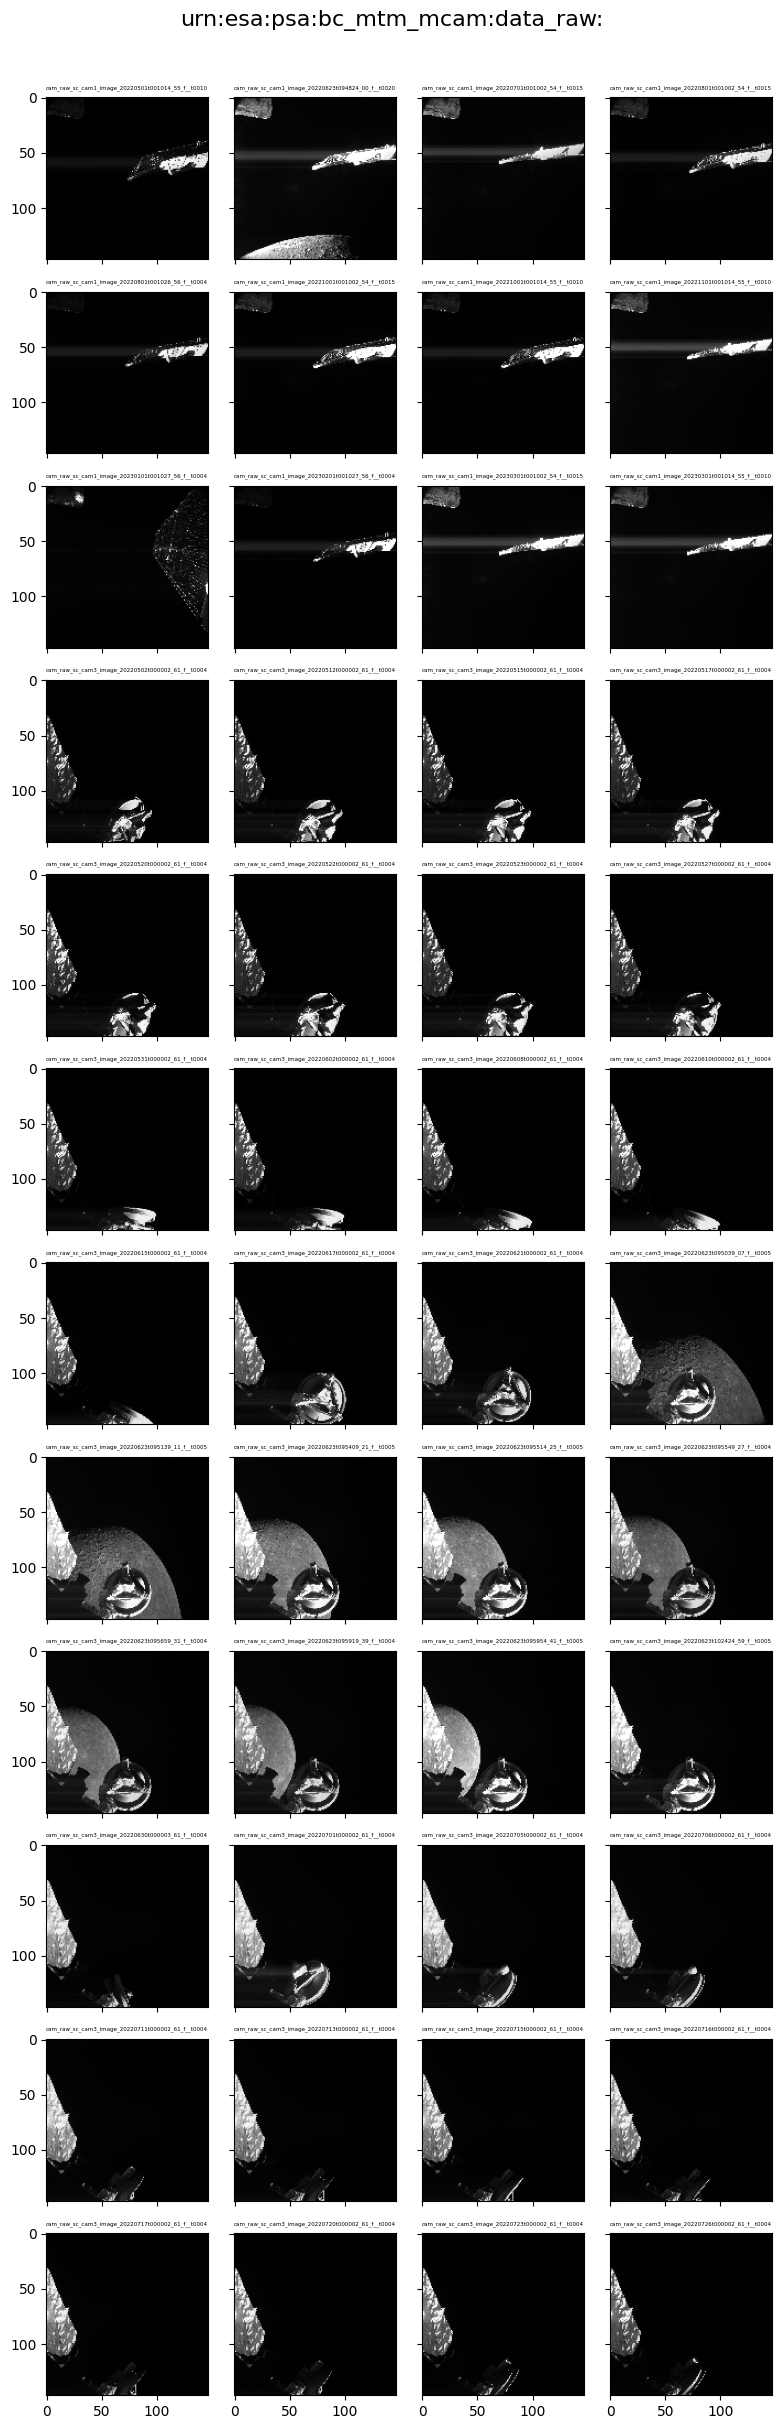

In [ ]:
page = 1

fig, axs = plt.subplots(12,4 , figsize=(8, 24))
size = 4*12
#used to track memory usage
mem_vals = []

for i, image_path in enumerate(urls[size*(page-1):size*page]):
    response = requests.get(image_path[0])
    with fits.open(image_path[0]) as hdul:
        image_data = hdul[1].data
    row, col = i // 4, i % 4
    axs[row, col].imshow(image_data[0::7,0::7], cmap='gray')  #Manually compressing images to load faster
    axs[row, col].set_title(resp_data[i]['properties']['lid'][0][33:], fontsize = 4)

    #Monitor memory
    process = psutil.Process(os.getpid())
    mem_usage = process.memory_info().rss / 1024 ** 2
    mem_vals.append(mem_usage)

for ax in axs.flat:
    ax.label_outer()

plt.suptitle('urn:esa:psa:bc_mtm_mcam:data_raw:', fontsize=16,y=1.01)

plt.tight_layout()
plt.show()


## Plot memory usage

/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument

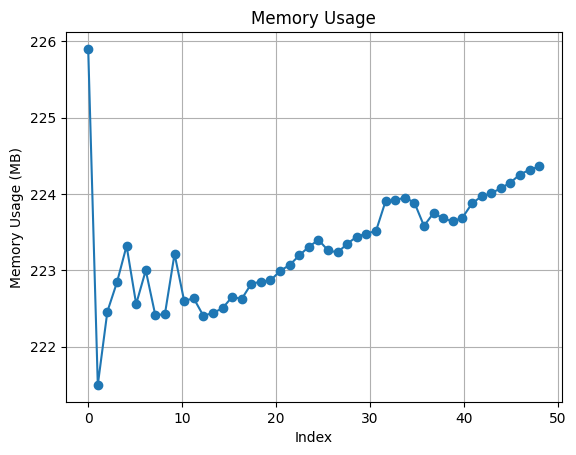

In [42]:
time = np.linspace(0, len(mem_vals),len(mem_vals))

plt.plot(time, mem_vals, marker='o')
plt.xlabel('Index')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage')
plt.grid(True)
plt.show()